#**1- Regression**

You need to find a **function** that maps some features or variables to others sufficiently well.

The dependent features are called the dependent variables, outputs, or **responses**.

The independent features are called the independent variables, inputs, or **predictors**.

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.

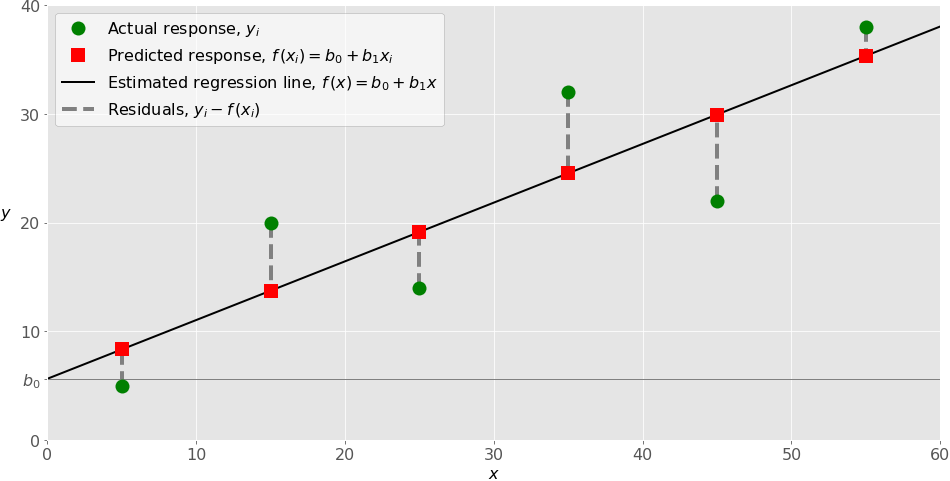

source: realpython.com

The package **`scikit-learn`** is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more. 

**There are five basic steps when you’re implementing linear regression:**

* Import the packages and classes you need.
* Provide data to work with.
* Create a regression model and fit it with existing data.
* Check the results of model fitting to know whether the model is satisfactory.
* Apply the model for predictions.

In [ ]:
# 1- Import the packages and classes you need.

import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# 2- Provide data to work with.

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [ ]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [ ]:
y

array([ 5, 20, 14, 32, 22, 38])

In [ ]:
# 3- Create a regression model and fit it with existing data.

#create an instance (variable)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
# This statement does the same thing as the previous two.
model = LinearRegression().fit(x, y)


In [ ]:
# 4- Check the results of model fitting to know whether the model is satisfactory.

# from sklearn.metrics import r2_score
# r2_score()

r_sq = model.score(x, y)
r_sq

0.7158756137479542

In [ ]:
print('intercept:', model.intercept_)

intercept: 5.633333333333329


In [ ]:
print('slope:', model.coef_)

slope: [0.54]


In [ ]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)

intercept: [5.63333333]


In [ ]:
print('slope:', new_model.coef_)

slope: [[0.54]]


In [ ]:
# 5-  Apply the model for predictions.

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [ ]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


##**Linear Regression Single Variable: Housing Price Prediction**

https://www.youtube.com/watch?v=8jazNUpO3lQ&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=2

Now, let's predict the housing prices based on the area with simple linear regression (price is a dependent variable and area is an independent variable)

`m is coefficient or slope or gradiant and b is intercept`

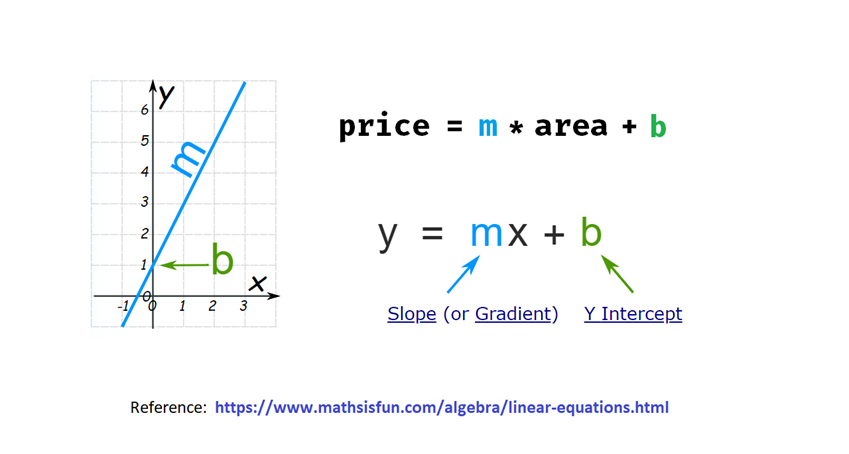

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
# Data has 2 colomn: Area per Sqr ft and price
df = pd.read_csv('prices.txt', delimiter = "\t")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


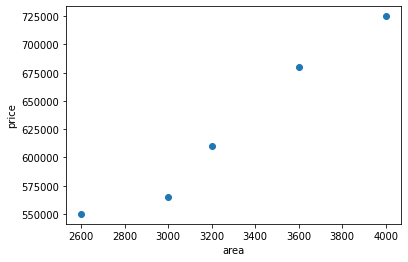

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price)

In [ ]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:
# is equal to m
reg.coef_

array([135.78767123])

In [ ]:
# is equal to b
reg.intercept_

180616.43835616432

In [ ]:
# is equal to x, what you want to predict 

reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [ ]:
# y = m*x + b
135.78767123*3300+180616.43835616432

628715.7534151643

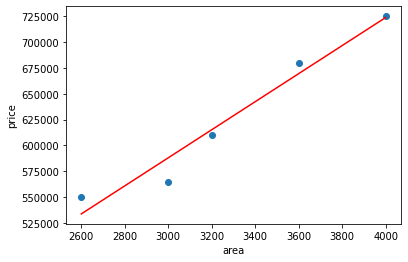

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price)
plt.plot(df.area, reg.predict(df[['area']]), color='red')

In [ ]:
# now lets predict a list of houses
df2 = pd.read_csv("prediction.txt")
df2.head(4)

,area
0,1000
1,1500
2,2300
3,3540


In [ ]:
p = reg.predict(df2)

In [ ]:
df2['price_cal'] = p

In [ ]:
df2.to_csv("PredictedPrice.csv", index=0)

##**Linear Regression Multiple Variables: Housing Price Prediction**

Prediction of a house is not only dependent of the area, but also number of bedrooms and the age of the house are 2 inportant factors.



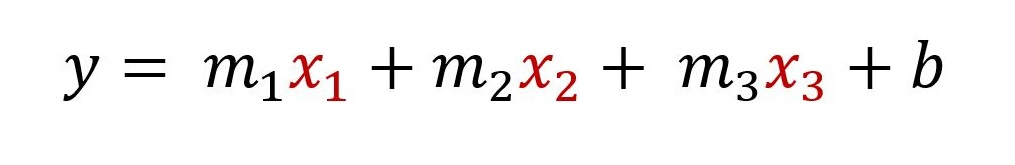

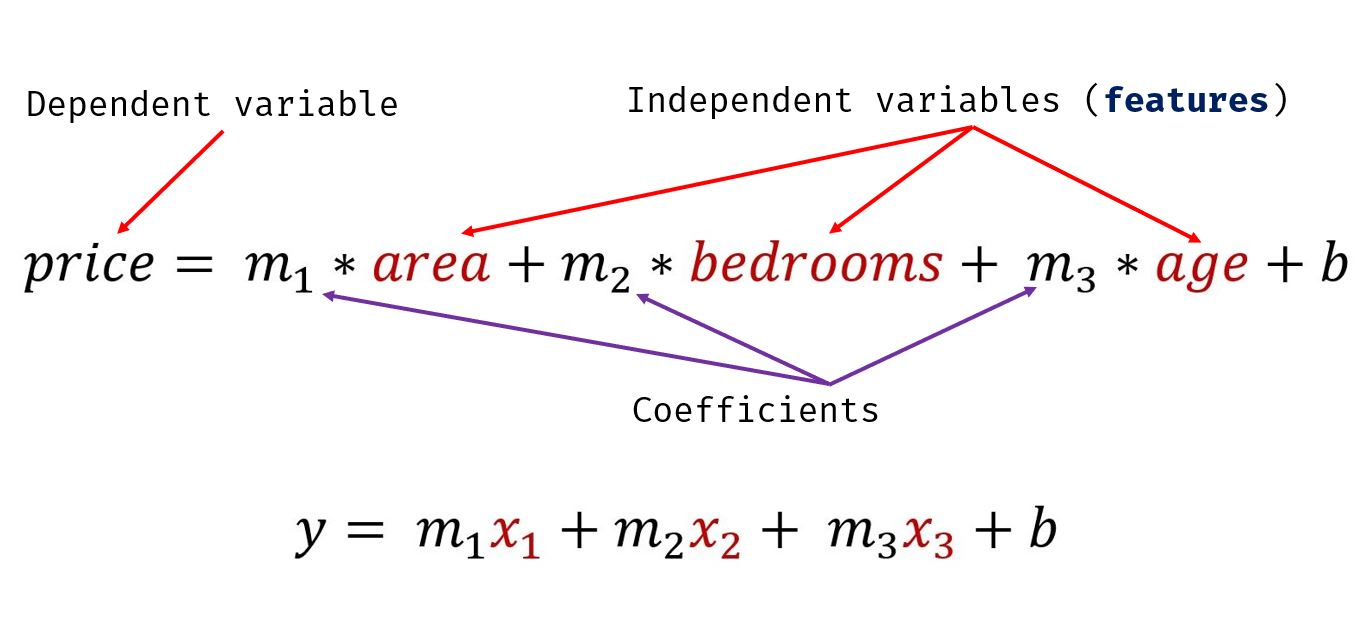

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
# Data has 2 colomn: Area per Sqr ft and price
df = pd.read_csv('price2data.txt', delimiter = "\t")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
# reg.fit(df.drop('price',axis='columns'),df.price)
reg.fit(df[['area','bedrooms','age']], df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
#Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [ ]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384


498408.25157402386